# Task 1 - Exploring supervised ML (Linear regression)

objective - In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

##### importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Collecting the data

In [2]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)


In [25]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Visualizing the data



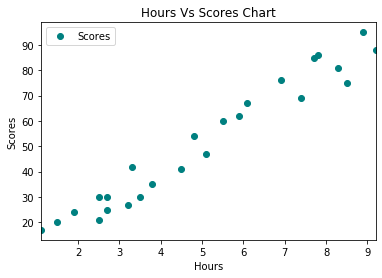

In [22]:
data.plot(x='Hours',y='Scores',c="#008080",style='o')
plt.title('Hours Vs Scores Chart')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### From the above graph we can observe that the relation between hours of study and their outcome is a positive relation and a regression line can be easily fitted for further predictive analysis

#### Data Preparation

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2 ,random_state = 0)

In [8]:
ytrain,Xtrain

(array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
        54, 95, 41], dtype=int64), array([[3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]))

In [9]:
ytest,Xtest

(array([20, 27, 69, 30, 62], dtype=int64), array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]))

Now that we have all the required data as we want to train the model , let's feed the data in the model for training.

## Training the model . 

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
line=model.coef_*X+model.intercept_
#y=mx+b

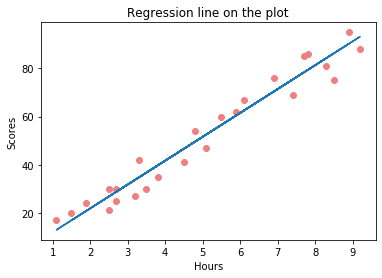

In [14]:
plt.scatter(X,y,c='#F08080')
plt.plot(X,line)
plt.title('Regression line on the plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### The above plot shows how a straight line is fitted throught entire data which is fundamental of linear regression


## Predictions and Evaluation

In [15]:
ypred=model.predict(Xtest)


In [16]:
ypred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
df = pd.DataFrame({'Actual':ytest,'Predictions':ypred})

In [18]:
df

,Actual,Predictions
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Evaluating the model

In [19]:
from sklearn import metrics 

In [20]:
print('Mean squared error', metrics.mean_squared_error(ypred,ytest))

Mean squared error 21.5987693072174


In [21]:
hr=9.25
pred=model.predict([[hr]])
print("If a person studied for 9.25 hours studying he will get {}".format(pred[0]))

If a person studied for 9.25 hours studying he will get 93.69173248737538
